# Bắt đầu 

1. Định nghĩa vấn đề (Define Problem)

        Mô tả:

Bộ dữ liệu Pima Indians Diabetes được thu thập bởi National Institute of Diabetes and Digestive and Kidney Diseases.

Tập dữ liệu bao gồm thông tin y tế của 768 bệnh nhân nữ từ 21 tuổi trở lên, đều có nguồn gốc Pima Indian.

Mục tiêu của bài toán là dự đoán khả năng mắc bệnh tiểu đường của bệnh nhân dựa trên các thuộc tính y tế.

    Dữ liệu vào (Input Attributes):

Number of times pregnant (Số lần mang thai)

Plasma glucose concentration (Nồng độ glucose trong huyết tương sau 2 giờ)

Diastolic blood pressure (Huyết áp tâm trương - mm Hg)

Triceps skin fold thickness (Độ dày nếp gấp da cánh tay - mm)

2-Hour serum insulin (Insulin huyết thanh sau 2 giờ - mu U/ml)

Body mass index (Chỉ số BMI = cân nặng/chiều cao²)

Diabetes pedigree function (Chỉ số phả hệ tiểu đường)

Age (Tuổi - năm)

    Kết quả (Output / Class variable):

0 = Không mắc tiểu đường

1 = Mắc tiểu đường

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [1]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [4]:
# Load dataset
data_path  = "pima-indians-diabetes.data.csv"
data_names = [
    "pregnancies",        # số lần mang thai
    "glucose",            # nồng độ glucose
    "blood_pressure",     # huyết áp tâm trương
    "skin_thickness",     # độ dày da
    "insulin",            # insulin huyết thanh
    "bmi",                # chỉ số BMI
    "diabetes_pedigree",  # chỉ số phả hệ tiểu đường
    "age",                # tuổi
    "class"               # kết quả: 0 = không tiểu đường, 1 = tiểu đường
]

df_dataset = pd.read_csv(data_path, names=data_names)
print(df_dataset.head())

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [5]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
pregnancies            int64
glucose                int64
blood_pressure         int64
skin_thickness         int64
insulin                int64
bmi                  float64
diabetes_pedigree    float64
age                    int64
class                  int64
dtype: object
+ Contents: 


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   class              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Nhận xét ##

Dữ liệu có 8 đặc trưng để phân lớp: pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age.

Giá trị các đặc trưng đều là số thực hoặc số nguyên, nhưng đơn vị đo khác nhau (ví dụ: mmHg cho huyết áp, kg/m² cho BMI, năm cho tuổi...).

Tổng số dòng dữ liệu là 768 dòng và 9 cột.

    Nhãn phân lớp nằm ở cột class, với giá trị:

0 = không tiểu đường

1 = có tiểu đường.

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [6]:
has_null = df_dataset.isnull().sum().any() 
has_nan  = df_dataset.isna().sum().any() #not a number
n_duplicated = df_dataset.duplicated().sum() # kt trùng lặp trên cột
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')

if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')

if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


## Nhận xét ##
Không có ô nào null và nan

Không có số dòng bị trùng 

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [7]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetes_pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Nhận xét ## 
Nhiều thuộc tính có giá trị 0 và 1 số thuộc tính không thể bằng 0 nên coi là thiếu dữ liệu

blood_pressure: trung bình 69 mmHg, thấp hơn mức huyết áp chuẩn (~80 mmHg cho huyết áp tâm trương).

insulin: độ lệch chuẩn lớn (115) max tới 846 dữ liệu phân bố lệch phải mạnh

class: mean ≈ 0.35 → khoảng 35% bệnh nhân được chẩn đoán dương tính với tiểu đường, dữ liệu mất cân bằng




#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [8]:
df_dataset["class"].value_counts()

class
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
+ Dữ liệu cần phân loại 1 thuộc tính class 
+ Các lớp là mất cân bằng với nhau nhiều hơn với mẫu âm tính 

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [12]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (skin_thickness, insulin) = có tương đồng khá cao (0.437) da dày thì insulin cao
    + (skin_thickness và bmi) = có tương đồng khá cao (0.393) bmi cao thì da dày
    + (pregnancies và age) = có tương đồng khá cao (0.544) số lần mang thai tăng khi tuổi tăng

    Tương quan mạnh nhất với nhãn class:

glucose (0.466) → đường huyết là yếu tố quan trọng nhất trong chẩn đoán tiểu đường.

bmi (0.293) → chỉ số khối cơ thể cũng có ảnh hưởng.

age (0.238) và pregnancies (0.222) cũng có quan hệ nhưng yếu hơn.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

    **Box and whisker plots**
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

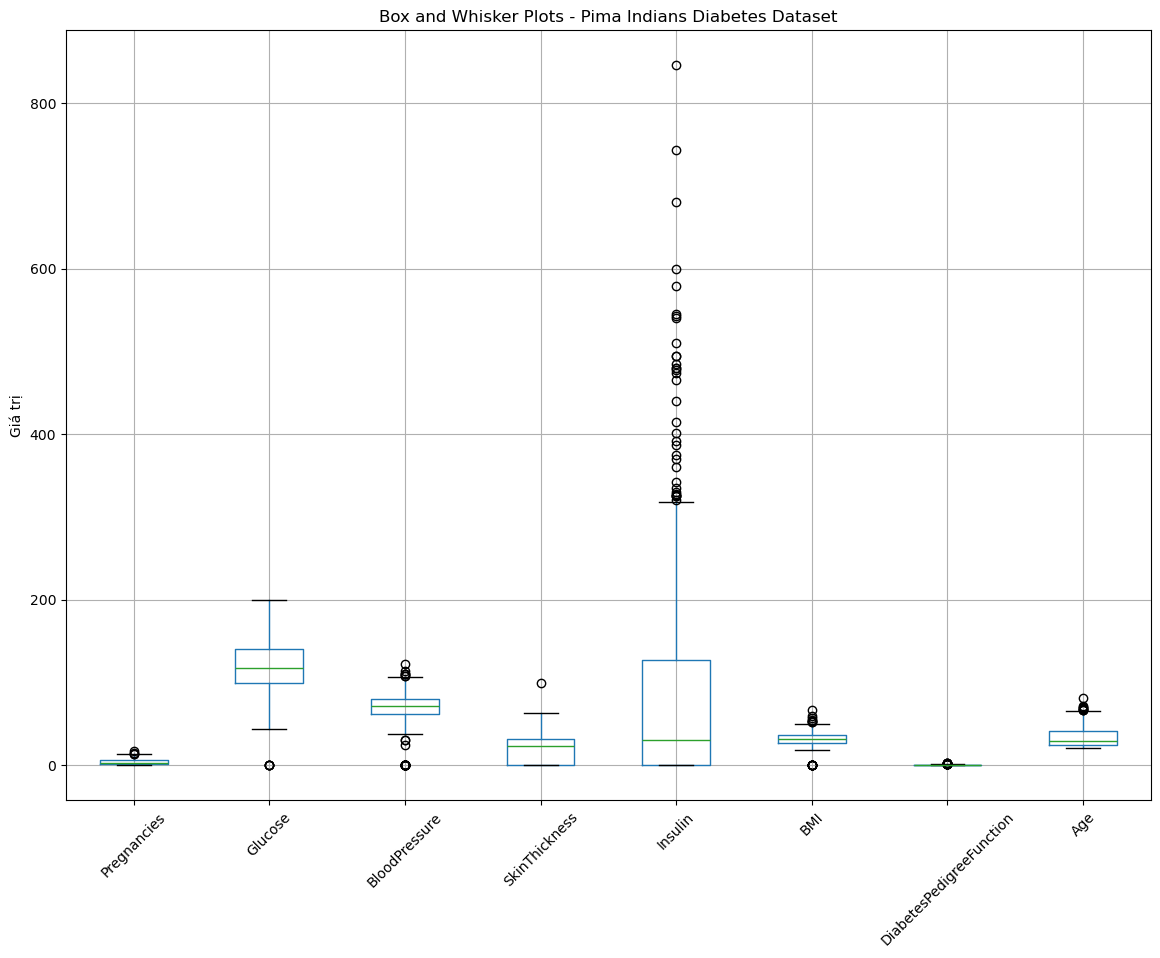

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đặt tên cột cho dataset
col_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Đọc dữ liệu
data_path = "pima-indians-diabetes.data.csv"
df = pd.read_csv(data_path, names=col_names)

# Vẽ Box and Whisker plots cho toàn bộ thuộc tính (trừ Outcome)
plt.figure(figsize=(14,10))
df.drop('Outcome', axis=1).boxplot()
plt.title("Box and Whisker Plots - Pima Indians Diabetes Dataset")
plt.ylabel("Giá trị")
plt.xticks(rotation=45)
plt.show()

**Nhận xét**:
+ Độ trải rộng giữa các tính chất khá khác nhau ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')
+ Độ lệch của Pregnancies, Insulin, Age theo hướng giá trị nhỏ.
+ Độ lệch của  SkinThickness,  theo hướng giá trị lớn.
+ Phân bố giá trị của Glucose, BloodPressure, BMI, DiabetesPedigreeFunction khá cân bằng
+ Insulin rất nhiều outliers > 300, thậm chí gần 900 thuộc tính này phân tán mạnh nhất

**Biểu đồ Histogram**

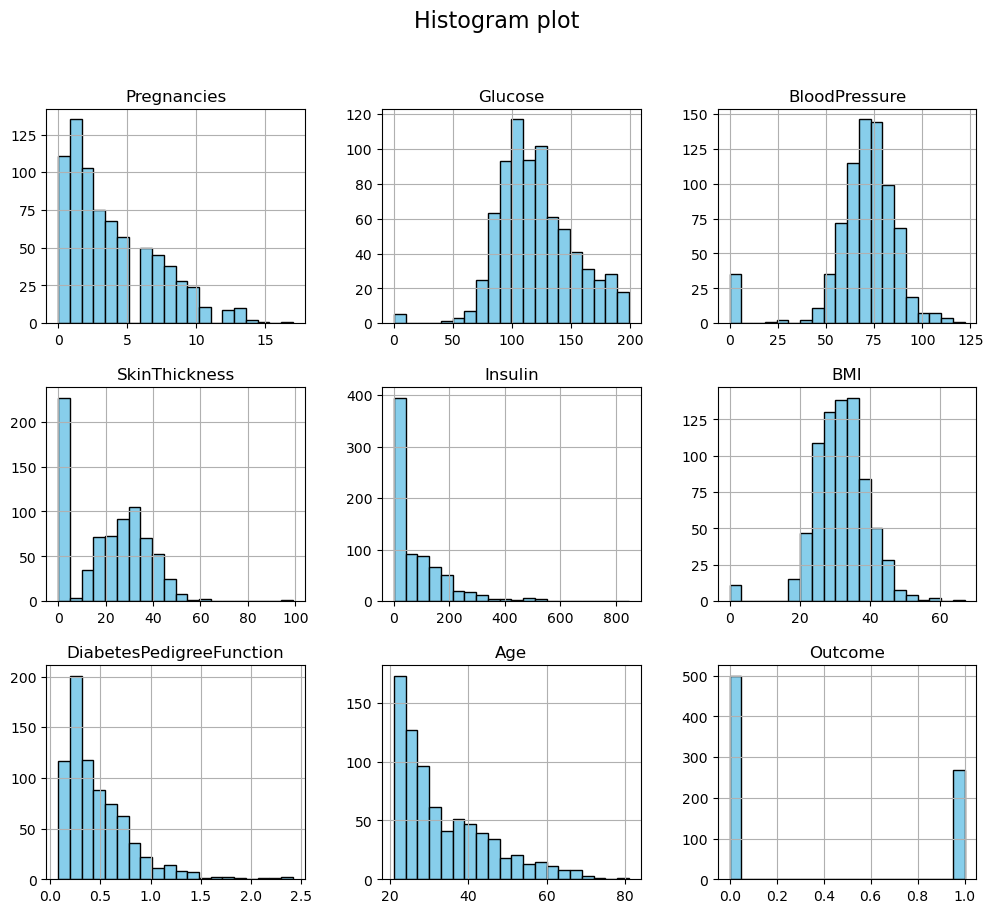

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
data_path  = "pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(data_path, names=columns)

# Vẽ histogram
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram plot", fontsize=16)
plt.show()


#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

<Figure size 1200x1200 with 0 Axes>

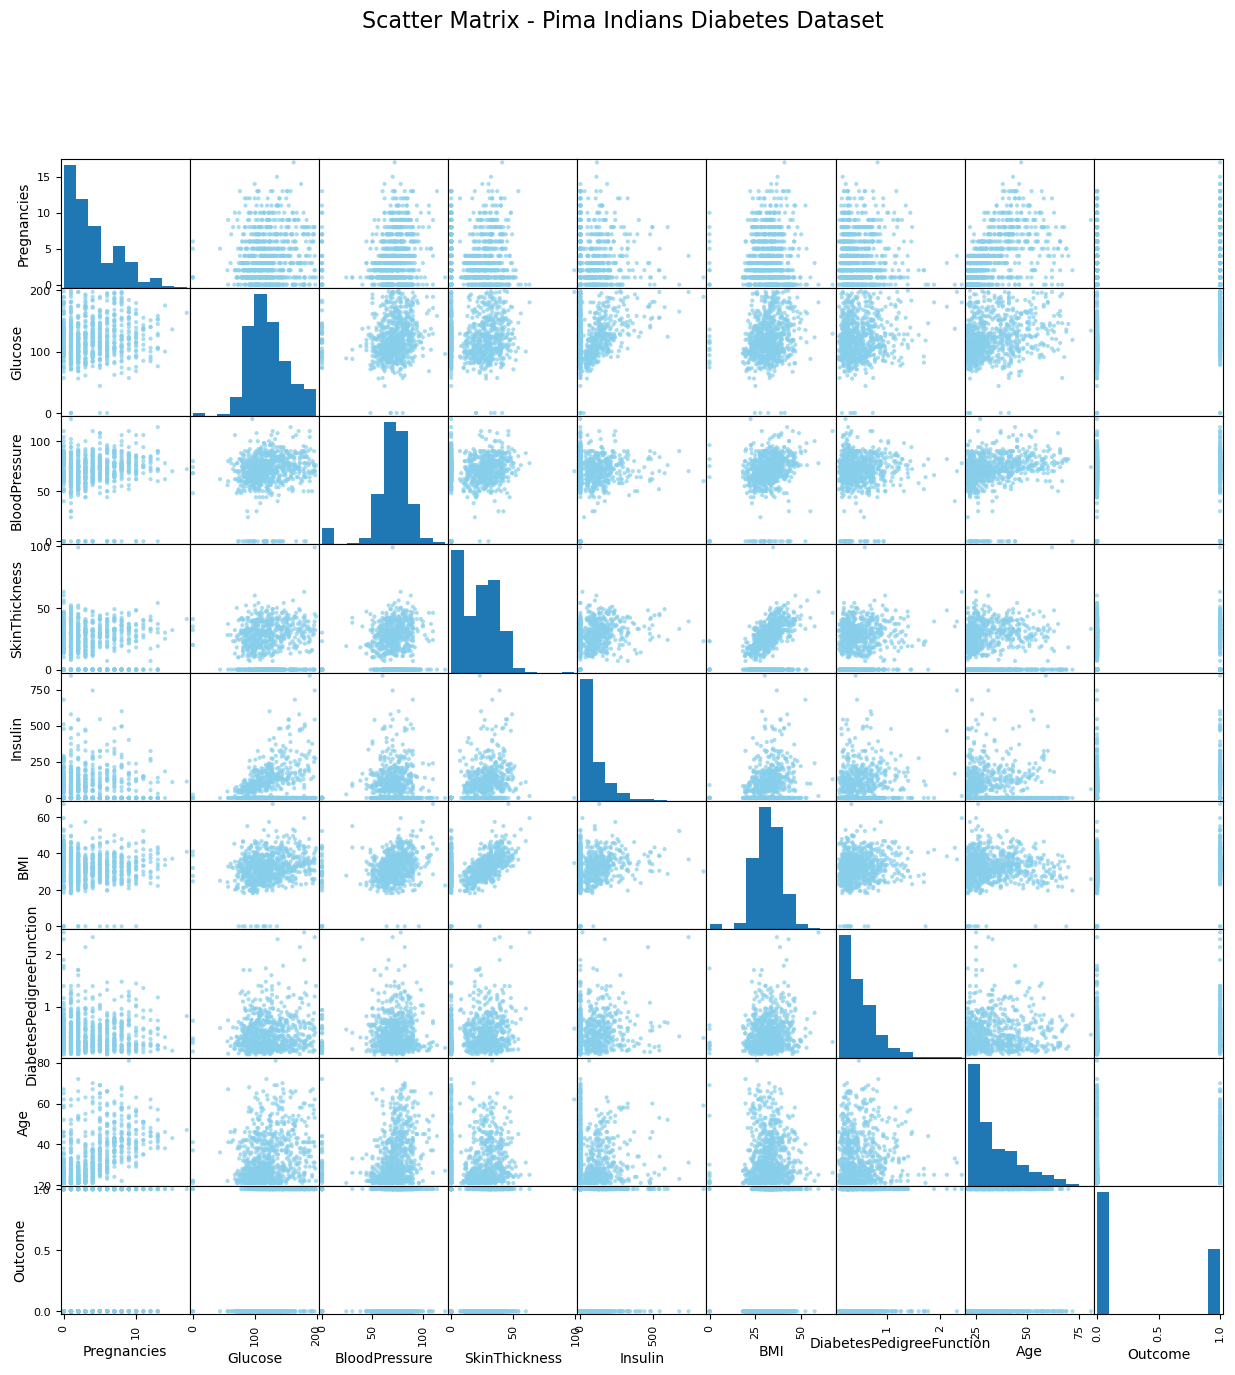

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Đọc dữ liệu
data_path  = "pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(data_path, names=columns)

# Vẽ Scatter Matrix
plt.figure(figsize=(12, 12))
scatter_matrix(df, figsize=(15, 15), diagonal='hist', alpha=0.7, color="skyblue")
plt.suptitle("Scatter Matrix - Pima Indians Diabetes Dataset", fontsize=16)
plt.show()

Pregnancies – Age: có xu hướng dương → phụ nữ lớn tuổi thường có nhiều lần mang thai hơn.

Glucose – Outcome: có sự phân tách → người có chỉ số glucose cao dễ bị tiểu đường hơn.

BMI – Outcome: cũng có mối quan hệ → chỉ số BMI cao liên quan đến nguy cơ tiểu đường.

Insulin – SkinThickness: có mối quan hệ khá rõ → hợp lý vì chúng đều liên quan đến trao đổi chất.

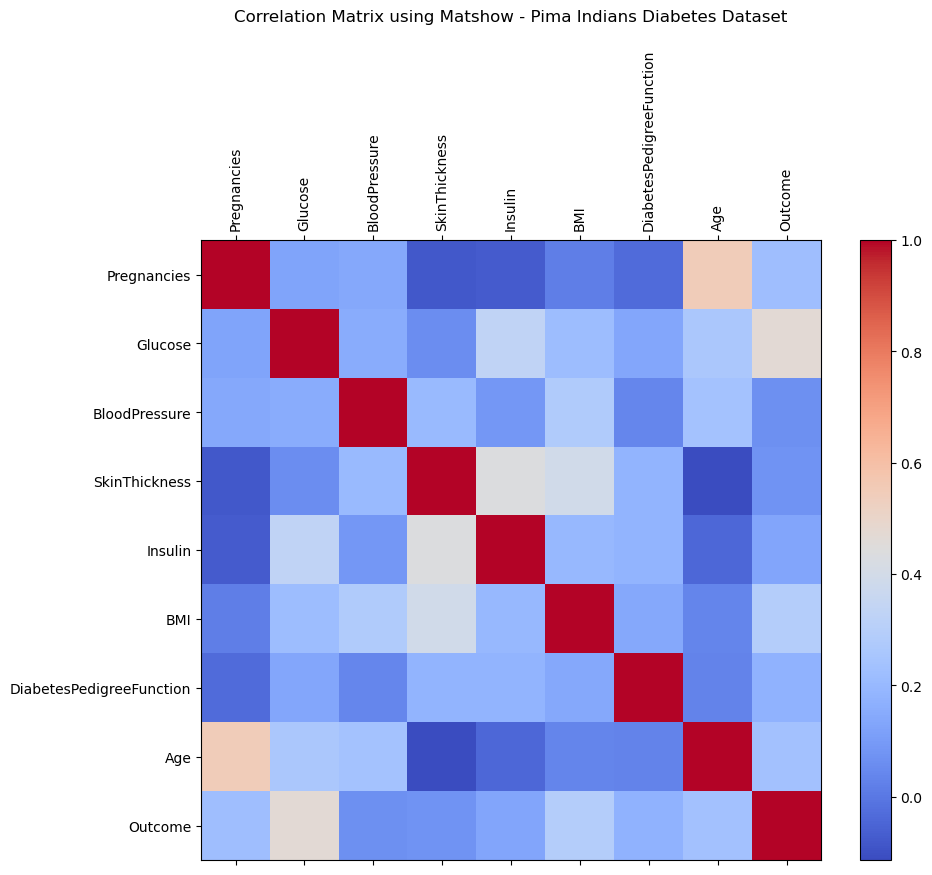

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
data_path  = "pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(data_path, names=columns)

# Tính ma trận tương quan
corr = df.corr()

# Vẽ biểu đồ matshow
plt.figure(figsize=(10, 8))
cax = plt.matshow(corr, cmap="coolwarm", fignum=1)
plt.colorbar(cax)

# Thêm nhãn cho trục
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix using Matshow - Pima Indians Diabetes Dataset", pad=20)
plt.show()


## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [28]:
df_clean = df_dataset.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [29]:
display.display(df_dataset[df_dataset.duplicated()])
# hehe :~)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,class


Không có trùng lặp trong mẫu

#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [30]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


    Có 3 hướng xử lí: Xóa nguyên cột, xóa dòng hoặc điền giá trị vào ô trống 

### 4.2. Biến đổi dữ liệu (Data Transforms)

Nếu thuộc tính có 1 vài giá trị kí tự biểu diễn nó dưới dạng one hot. Ex country: gồm  F, US, V. Đại diện isF 1 0 0, isUS 0 1 0, isV 0 0 1  thành 3 cột

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu
filename = "pima-indians-diabetes.data.csv"
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
           "BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv(filename, names=columns)

# Chia X (features) và y (label)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Chuẩn hóa Min-Max về [0,1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Chuyển lại thành DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized["Outcome"] = y

print(df_normalized.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


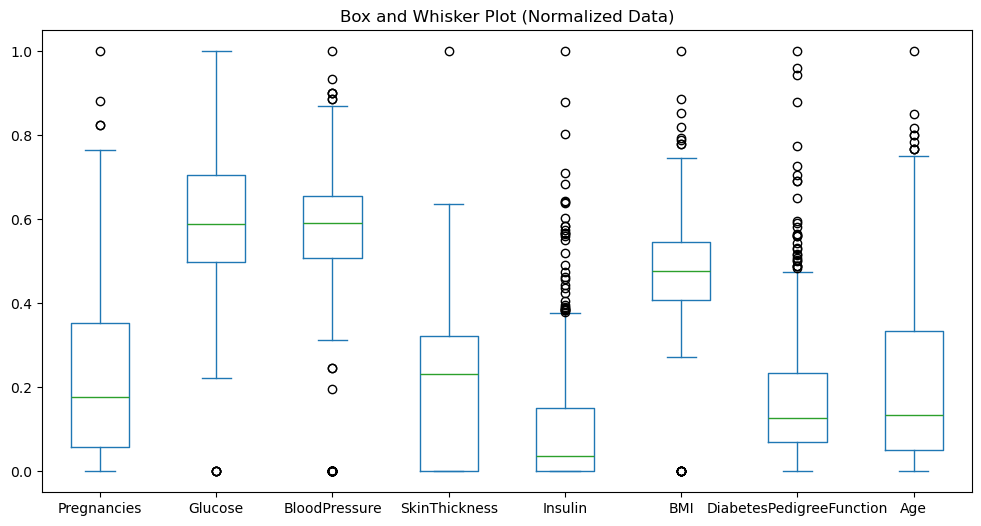

In [75]:
df_normalized[scale_columns].plot(kind="box", figsize=(12,6))
plt.title("Box and Whisker Plot (Normalized Data)")
plt.show()

In [82]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
# tính toán thống kê X
scaler = StandardScaler().fit(X)
# áp dụng chuẩn hóa cho toàn bộ X 
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


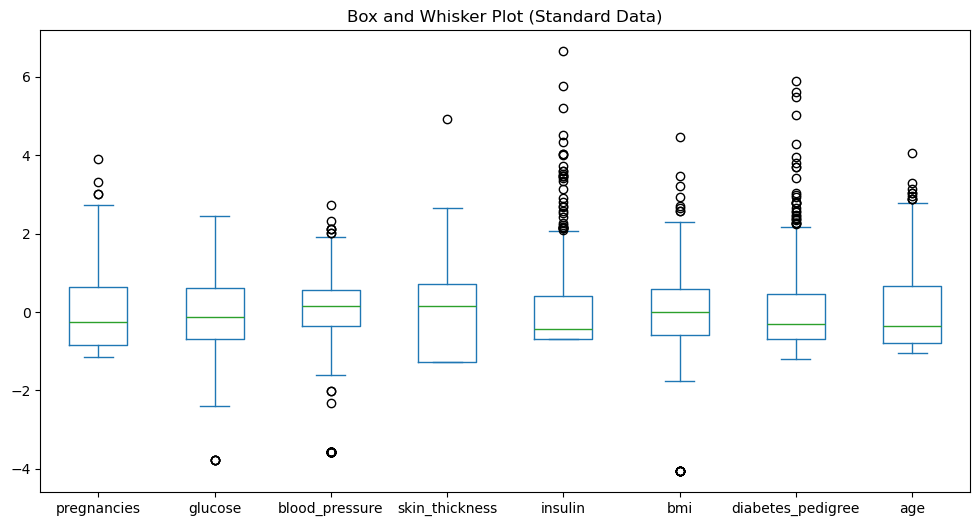

In [83]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));
plt.title("Box and Whisker Plot (Standard Data)")
plt.show()

In [84]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [86]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[ 11.    138.     76.      0.      0.     33.2     0.42   35.   ]
 [  5.    189.     64.     33.    325.     31.2     0.583  29.   ]
 [  2.    122.     70.     27.      0.     36.8     0.34   27.   ]
 [  2.    175.     88.      0.      0.     22.9     0.326  22.   ]
 [  1.    144.     82.     40.      0.     41.3     0.607  28.   ]]
Output = [0. 1. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[0.00e+00 1.34e+02 5.80e+01 2.00e+01 2.91e+02 2.64e+01 3.52e-01 2.10e+01]
 [5.00e+00 1.43e+02 7.80e+01 0.00e+00 0.00e+00 4.50e+01 1.90e-01 4.70e+01]
 [2.00e+00 9.90e+01 0.00e+00 0.00e+00 0.00e+00 2.22e+01 1.08e-01 2.30e+01]
 [6.00e+00 1.25e+02 6.80e+01 3.00e+01 1.20e+02 3.00e+01 4.64e-01 3.20e+01]
 [1.00e+00 1.80e+02 0.00e+00 0.00e+00 0.00e+00 4.33e+01 2.82e-01 4.10e+01]]
Output = [0. 0. 0. 0. 1.]


In [89]:
import os
import numpy as np
import joblib

# Thư mục lưu
save_dir = "exps/pima"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Lưu dữ liệu train/test
np.savez(f'{save_dir}/data.npz', 
         X_train=X_train, X_test=X_test, 
         y_train=y_train, y_test=y_test)

# Lưu dataframe đã làm sạch
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

# Nếu bạn có encoder cho nhãn (label encoder) thì lưu, 
# còn nếu không có thì bỏ qua dòng này
# joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

# Kiểm tra file trong thư mục
print(os.listdir(save_dir))


['data.npz', 'df_clean.xlsx']


In [90]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()


dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [91]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Kết thúc